<a href="https://colab.research.google.com/github/tahaaa22/SBES361-Machine-learning-Course/blob/master/Applied_Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Team Members


Amr Yasser Doma 1210273

Ahmed Mohamed Taha 1210193

Mehrati Sameh 1210084

#Diabetes Prediction using ML

##Setup

### Python Packages

In [ ]:
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn

###Read the CSV

In [ ]:
import pandas as pd
data = pd.read_csv('diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.shape

(768, 9)

##Data Preprocessing



### Handling Missing Values

In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


#### No null values found, so we will check for zeroes where it doesn't make sense

In [ ]:
cols_with_zero_bool = (data == 0).any(axis=0)
columns_with_zeros = data.columns[cols_with_zero_bool].tolist()
zero_counts = (data[columns_with_zeros] == 0).sum()
print("Count of zero values in each column:")
print(zero_counts.to_string())

Count of zero values in each column:
Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500


#### Pregnancies and Outcome are expected to have 0, but BloodPressure, SkinThickness and Insulin aren't.

In [ ]:
columns_to_update = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']

#### We will initially replace zeroes with the mean

In [ ]:
for col in columns_to_update:
    # Calculate the mean excluding zeroes
    col_mean = data[col][data[col] != 0].mean()
    # Replace the value
    data[col] = data[col].replace(0, col_mean)

In [ ]:
cols_with_zero_bool = (data == 0).any(axis=0)
columns_with_zeros = data.columns[cols_with_zero_bool].tolist()
zero_counts = (data[columns_with_zeros] == 0).sum()
print("Count of zero values in each column:")
print(zero_counts.to_string())

Count of zero values in each column:
Pregnancies    111
Outcome        500


#### Now all zeroes have been replaced with the mean.

###Handling outliers

In [ ]:
columns_to_update = ['BMI','Glucose', 'BloodPressure', 'SkinThickness','Insulin']

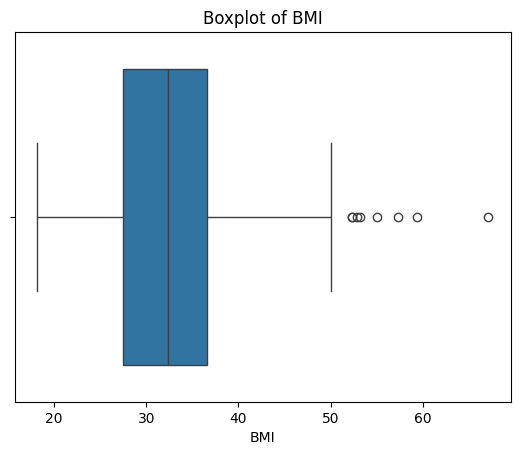

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['BMI'])
plt.title("Boxplot of BMI")
plt.show()

#### We decided to use IQR

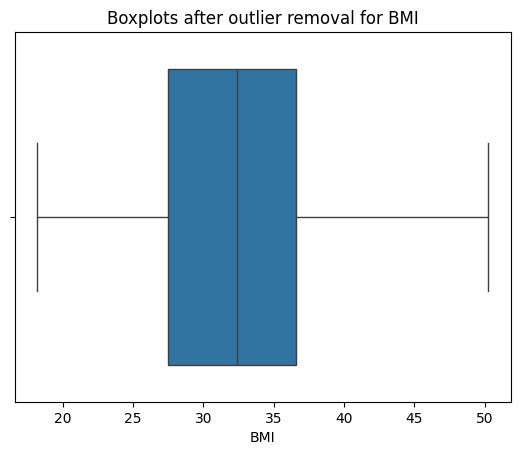

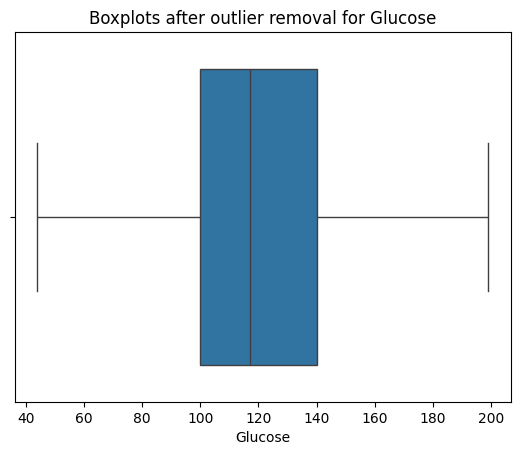

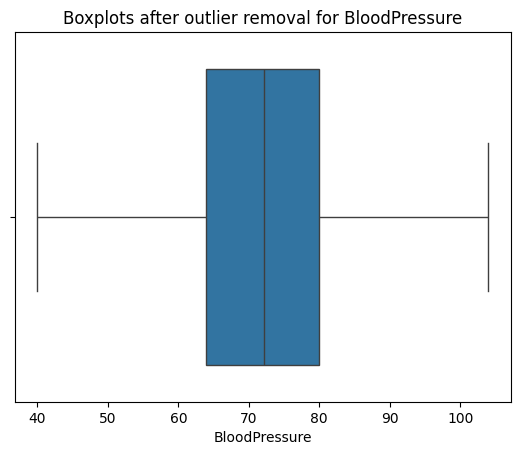

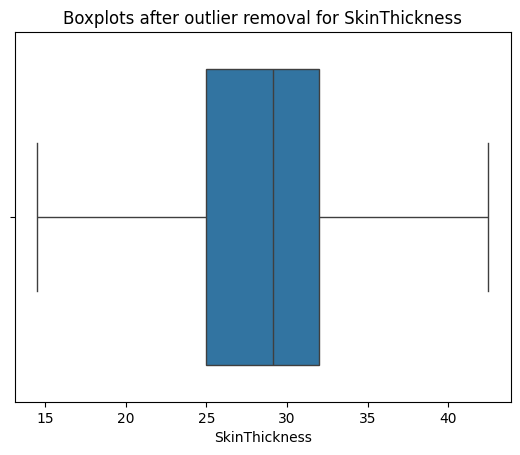

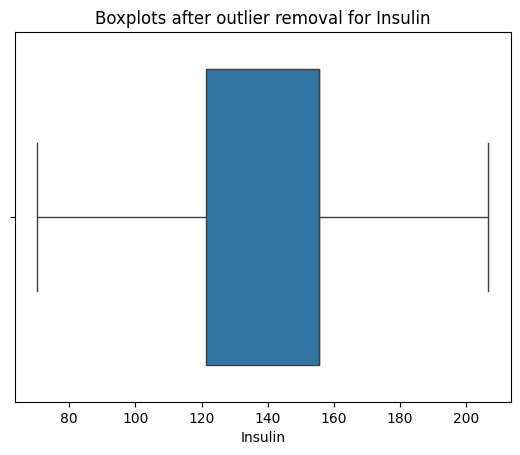

In [ ]:
for col in columns_to_update:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    data[col] = data[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplots after outlier removal for {col}")
    plt.show()

### Feature Scaling: Normalization

#### Normalizing the columns

In [ ]:
columns_to_update = ['Pregnancies','BMI','Glucose', 'BloodPressure', 'SkinThickness','Insulin','DiabetesPedigreeFunction','Age']

Text(0.5, 1.0, 'BMI before Min-Max scaler')

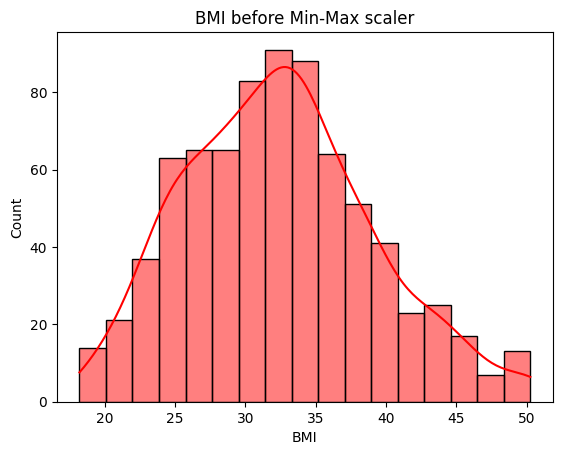

In [ ]:
sns.histplot(data['BMI'],kde=True,color="red")
plt.title("BMI before Min-Max scaler")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_std=MinMaxScaler()


In [ ]:
for col in columns_to_update:
    data[[col]]=scaler_std.fit_transform(data[[col]])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.50000,0.732143,0.625000,0.480499,0.234415,0.483333,1
1,0.058824,0.264516,0.40625,0.517857,0.625000,0.262090,0.116567,0.166667,0
2,0.470588,0.896774,0.37500,0.523336,0.625000,0.159126,0.253629,0.183333,1
3,0.058824,0.290323,0.40625,0.303571,0.173081,0.308892,0.038002,0.000000,0
4,0.000000,0.600000,0.00000,0.732143,0.716428,0.776911,0.943638,0.200000,1


Text(0.5, 1.0, 'BMI After Min-Max scaler')

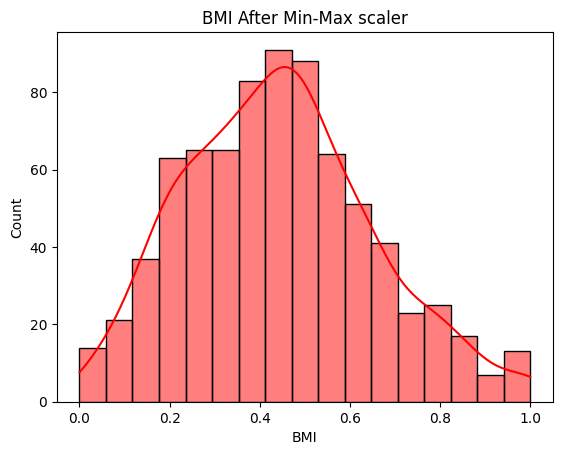

In [ ]:
sns.histplot(data['BMI'],kde=True,color="red")
plt.title("BMI After Min-Max scaler")

### Data Splitting using K-Fold

We chose K-fold because our dataset is relatively small (770 row)

In [ ]:
from sklearn.model_selection import KFold
X=data.drop("Outcome",axis=1)
Y=data["Outcome"]
kf= KFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.50000,0.732143,0.625000,0.480499,0.234415,0.483333
1,0.058824,0.264516,0.40625,0.517857,0.625000,0.262090,0.116567,0.166667
2,0.470588,0.896774,0.37500,0.523336,0.625000,0.159126,0.253629,0.183333
3,0.058824,0.290323,0.40625,0.303571,0.173081,0.308892,0.038002,0.000000
4,0.000000,0.600000,0.00000,0.732143,0.716428,0.776911,0.943638,0.200000


In [ ]:
import pandas as pd
from google.colab import files

X.to_csv("preprocessed_data.csv", index=False)
files.download("preprocessed_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Select and Evaluate the Best Model

In [ ]:
# -------------------------------
# Part 1: Train/Test Split (No CV, No Hyperparameter Tuning)
# -------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

# Create a fixed train/test split (keep earlier preprocessing unchanged)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Models to evaluate (same family as before)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Evaluate models on the single train/test split
part1_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    part1_results[name] = {
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "Train R2": train_r2,
        "Test R2": test_r2,
        "Train MAE": train_mae,
        "Test MAE": test_mae
    }

results_df = pd.DataFrame(part1_results).T
results_df = results_df.sort_values("Test RMSE")
results_df.style.format("{:.4f}")


,Train RMSE,Test RMSE,Train R2,Test R2,Train MAE,Test MAE
Ridge,0.3920,0.4042,0.3218,0.2884,0.3247,0.3355
Linear,0.3919,0.4045,0.3221,0.2874,0.3229,0.3337
Random Forest,0.1504,0.4077,0.9002,0.2760,0.1123,0.3142
Gradient Boosting,0.2572,0.4221,0.7081,0.2238,0.1939,0.3277
Lasso,0.4760,0.4793,0.0000,-0.0005,0.4531,0.4563


In [ ]:
# -------------------------------
# Automatic analysis using simple heuristics
# -------------------------------
print("=== Part 1: Train/Test (No CV, No tuning) — Analysis ===\n")

for name, row in results_df.iterrows():
    train_r2 = row["Train R2"]
    test_r2 = row["Test R2"]
    train_rmse = row["Train RMSE"]
    test_rmse = row["Test RMSE"]

    gap = train_r2 - test_r2

    # Heuristic rules (adjust thresholds if you prefer)
    if gap > 0.3 and train_r2 > 0.6:
        conclusion = "Strong sign of overfitting"
    elif train_r2 < 0.3 and test_r2 < 0.3:
        conclusion = "Likely underfitting"
    else:
        conclusion = "Relatively balanced performance"

    print(f"{name}: Train R2={train_r2:.3f}, Test R2={test_r2:.3f}, Train RMSE={train_rmse:.4f}, Test RMSE={test_rmse:.4f} -> {conclusion}")

# Nice markdown paragraph you can paste into your report (edit as you like)
report_md_part1 = f"""
**Part 1 — Train/Test summary (no CV or hyperparameter tuning)**

The table above reports Train / Test RMSE, MAE, and R² for each model using a single 80/20 split.
Based on the heuristics:
- Models with much higher train performance vs. test performance are flagged as *overfitting*.
- Models with low performance on both train and test are flagged as *underfitting*.
- Others are considered relatively balanced.

"""
print("\n---\n")
print(report_md_part1)


=== Part 1: Train/Test (No CV, No tuning) — Analysis ===

Ridge: Train R2=0.322, Test R2=0.288, Train RMSE=0.3920, Test RMSE=0.4042 -> Relatively balanced performance
Linear: Train R2=0.322, Test R2=0.287, Train RMSE=0.3919, Test RMSE=0.4045 -> Relatively balanced performance
Random Forest: Train R2=0.900, Test R2=0.276, Train RMSE=0.1504, Test RMSE=0.4077 -> Strong sign of overfitting
Gradient Boosting: Train R2=0.708, Test R2=0.224, Train RMSE=0.2572, Test RMSE=0.4221 -> Strong sign of overfitting
Lasso: Train R2=0.000, Test R2=-0.000, Train RMSE=0.4760, Test RMSE=0.4793 -> Likely underfitting

---


**Part 1 — Train/Test summary (no CV or hyperparameter tuning)**

The table above reports Train / Test RMSE, MAE, and R² for each model using a single 80/20 split.
Based on the heuristics:
- Models with much higher train performance vs. test performance are flagged as *overfitting*.
- Models with low performance on both train and test are flagged as *underfitting*.
- Others are considere

In [ ]:
# -------------------------------
# Part 2: Cross-Validation (on the TRAINING SET) — baseline CV mean & std RMSE
# -------------------------------
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_baseline = {}
for name, model in models.items():
    # Use the training set for cross-validation to avoid leaking test info
    rmse_scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error'))
    cv_baseline[name] = {
        "CV Mean RMSE (train)": np.mean(rmse_scores),
        "CV Std RMSE (train)": np.std(rmse_scores)
    }

cv_results_df = pd.DataFrame(cv_baseline).T
cv_results_df = cv_results_df.sort_values("CV Mean RMSE (train)")
cv_results_df.style.format("{:.4f}")


,CV Mean RMSE (train),CV Std RMSE (train)
Gradient Boosting,0.3939,0.0138
Ridge,0.4023,0.0144
Linear,0.4030,0.0149
Random Forest,0.4066,0.0123
Lasso,0.4763,0.0090


In [ ]:
# -------------------------------
# GridSearchCV for selected models (fit on TRAINING SET only)
# -------------------------------
from sklearn.model_selection import GridSearchCV

param_grids = {
    "Ridge": {"alpha": [0.01, 0.1, 1.0, 10.0]},
    "Lasso": {"alpha": [0.0001, 0.001, 0.01, 0.1, 1.0]},
    "Random Forest": {"n_estimators": [100, 200], "max_depth": [None, 10, 20], "min_samples_split": [2, 5]},
    "Gradient Boosting": {"learning_rate": [0.01, 0.05, 0.1], "n_estimators": [100, 200], "max_depth": [3, 5]}
}

tuned_results = {}
best_estimators = {}

for name in models.keys():
    if name in param_grids:
        grid = GridSearchCV(models[name], param_grids[name], cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_estimators[name] = grid.best_estimator_
        tuned_results[name] = {
            "Best CV RMSE (train)": np.sqrt(-grid.best_score_),
            "Best Parameters": grid.best_params_
        }
    else:
        # No parameters to tune (Linear), use the fitted model on the training set as-is
        models[name].fit(X_train, y_train)
        best_estimators[name] = models[name]
        tuned_results[name] = {
            "Best CV RMSE (train)": np.sqrt(-cross_val_score(models[name], X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean()),
            "Best Parameters": None
        }

tuned_results_df = pd.DataFrame(tuned_results).T
# Apply formatting only to numerical columns
tuned_results_df.style.format({"Best CV RMSE (train)": "{:.4f}"})

,Best CV RMSE (train),Best Parameters
Linear,0.4033,nan
Ridge,0.4026,{'alpha': 1.0}
Lasso,0.4032,{'alpha': 0.0001}
Random Forest,0.4034,"{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}"
Gradient Boosting,0.3930,"{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}"


In [ ]:
# -------------------------------
# Part 3: Comparison — combine results
# -------------------------------
# Baseline test metrics from Part1 (results_df)
baseline_test = results_df[["Test RMSE", "Test R2", "Test MAE"]].rename(columns={
    "Test RMSE": "Test RMSE (baseline)",
    "Test R2": "Test R2 (baseline)",
    "Test MAE": "Test MAE (baseline)"
})

# CV mean (from training set) and tuned CV and tuned test evaluate
cv_summary = cv_results_df.rename(columns={"CV Mean RMSE (train)": "CV Mean RMSE (train)", "CV Std RMSE (train)": "CV Std RMSE (train)"})
tuned_summary = tuned_results_df.rename(columns={"Best CV RMSE (train)": "Best CV RMSE (train)"})

comparison_df = baseline_test.join(cv_summary, how="outer").join(tuned_summary, how="outer").join(tuned_eval_df, how="outer")
comparison_df = comparison_df[[
    "Test RMSE (baseline)", "Test R2 (baseline)", "Test MAE (baseline)",
    "CV Mean RMSE (train)", "CV Std RMSE (train)",
    "Best CV RMSE (train)", "Best Parameters",
    "Test RMSE (after tuning)", "Test R2 (after tuning)", "Test MAE (after tuning)"
]]
comparison_df.style.format({
    "Test RMSE (baseline)": "{:.4f}",
    "Test R2 (baseline)": "{:.4f}",
    "Test MAE (baseline)": "{:.4f}",
    "CV Mean RMSE (train)": "{:.4f}",
    "CV Std RMSE (train)": "{:.4f}",
    "Best CV RMSE (train)": "{:.4f}",
    "Test RMSE (after tuning)": "{:.4f}",
    "Test R2 (after tuning)": "{:.4f}",
    "Test MAE (after tuning)": "{:.4f}",
})

,Test RMSE (baseline),Test R2 (baseline),Test MAE (baseline),CV Mean RMSE (train),CV Std RMSE (train),Best CV RMSE (train),Best Parameters,Test RMSE (after tuning),Test R2 (after tuning),Test MAE (after tuning)
Gradient Boosting,0.4221,0.2238,0.3277,0.3939,0.0138,0.3930,"{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}",0.4057,0.2833,0.3207
Lasso,0.4793,-0.0005,0.4563,0.4763,0.0090,0.4032,{'alpha': 0.0001},0.4044,0.2876,0.3338
Linear,0.4045,0.2874,0.3337,0.4030,0.0149,0.4033,nan,0.4045,0.2874,0.3337
Random Forest,0.4077,0.2760,0.3142,0.4066,0.0123,0.4034,"{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}",0.3996,0.3047,0.3079
Ridge,0.4042,0.2884,0.3355,0.4023,0.0144,0.4026,{'alpha': 1.0},0.4042,0.2884,0.3355


In [ ]:
# -------------------------------
# Evaluate the tuned (best) estimators on the held-out test set
# -------------------------------
tuned_eval = {}
for name, est in best_estimators.items():
    y_pred_test_tuned = est.predict(X_test)
    test_rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_test_tuned))
    test_r2_tuned = r2_score(y_test, y_pred_test_tuned)
    test_mae_tuned = mean_absolute_error(y_test, y_pred_test_tuned)

    tuned_eval[name] = {
        "Test RMSE (after tuning)": test_rmse_tuned,
        "Test R2 (after tuning)": test_r2_tuned,
        "Test MAE (after tuning)": test_mae_tuned
    }

tuned_eval_df = pd.DataFrame(tuned_eval).T
tuned_eval_df = tuned_eval_df.sort_values("Test RMSE (after tuning)")
tuned_eval_df.style.format("{:.4f}")


,Test RMSE (after tuning),Test R2 (after tuning),Test MAE (after tuning)
Random Forest,0.3996,0.3047,0.3079
Ridge,0.4042,0.2884,0.3355
Lasso,0.4044,0.2876,0.3338
Linear,0.4045,0.2874,0.3337
Gradient Boosting,0.4057,0.2833,0.3207


In [ ]:
# -------------------------------
# Part 3: Comparison — combine results
# -------------------------------
# Baseline test metrics from Part1 (results_df)
baseline_test = results_df[["Test RMSE", "Test R2", "Test MAE"]].rename(columns={
    "Test RMSE": "Test RMSE (baseline)",
    "Test R2": "Test R2 (baseline)",
    "Test MAE": "Test MAE (baseline)"
})

# CV mean (from training set) and tuned CV and tuned test evaluate
cv_summary = cv_results_df.rename(columns={"CV Mean RMSE (train)": "CV Mean RMSE (train)", "CV Std RMSE (train)": "CV Std RMSE (train)"})
tuned_summary = tuned_results_df.rename(columns={"Best CV RMSE (train)": "Best CV RMSE (train)"})

comparison_df = baseline_test.join(cv_summary, how="outer").join(tuned_summary, how="outer").join(tuned_eval_df, how="outer")
comparison_df = comparison_df[[
    "Test RMSE (baseline)", "Test R2 (baseline)", "Test MAE (baseline)",
    "CV Mean RMSE (train)", "CV Std RMSE (train)",
    "Best CV RMSE (train)", "Best Parameters",
    "Test RMSE (after tuning)", "Test R2 (after tuning)", "Test MAE (after tuning)"
]]
comparison_df.style.format({
    "Test RMSE (baseline)": "{:.4f}",
    "Test R2 (baseline)": "{:.4f}",
    "Test MAE (baseline)": "{:.4f}",
    "CV Mean RMSE (train)": "{:.4f}",
    "CV Std RMSE (train)": "{:.4f}",
    "Best CV RMSE (train)": "{:.4f}",
    "Test RMSE (after tuning)": "{:.4f}",
    "Test R2 (after tuning)": "{:.4f}",
    "Test MAE (after tuning)": "{:.4f}",
})

,Test RMSE (baseline),Test R2 (baseline),Test MAE (baseline),CV Mean RMSE (train),CV Std RMSE (train),Best CV RMSE (train),Best Parameters,Test RMSE (after tuning),Test R2 (after tuning),Test MAE (after tuning)
Gradient Boosting,0.4221,0.2238,0.3277,0.3939,0.0138,0.3930,"{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}",0.4057,0.2833,0.3207
Lasso,0.4793,-0.0005,0.4563,0.4763,0.0090,0.4032,{'alpha': 0.0001},0.4044,0.2876,0.3338
Linear,0.4045,0.2874,0.3337,0.4030,0.0149,0.4033,nan,0.4045,0.2874,0.3337
Random Forest,0.4077,0.2760,0.3142,0.4066,0.0123,0.4034,"{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}",0.3996,0.3047,0.3079
Ridge,0.4042,0.2884,0.3355,0.4023,0.0144,0.4026,{'alpha': 1.0},0.4042,0.2884,0.3355


In [ ]:
# -------------------------------
# Automated comparison discussion (printout)
# -------------------------------
print("=== Final Comparison & Discussion ===\n")

for name in comparison_df.index:
    base_rmse = comparison_df.loc[name, "Test RMSE (baseline)"]
    tuned_rmse = comparison_df.loc[name, "Test RMSE (after tuning)"]
    cv_rmse = comparison_df.loc[name, "CV Mean RMSE (train)"]
    best_cv_rmse = comparison_df.loc[name, "Best CV RMSE (train)"]

    # safe nan-checks
    base_rmse_str = f"{base_rmse:.4f}" if pd.notna(base_rmse) else "N/A"
    tuned_rmse_str = f"{tuned_rmse:.4f}" if pd.notna(tuned_rmse) else "N/A"
    cv_rmse_str = f"{cv_rmse:.4f}" if pd.notna(cv_rmse) else "N/A"
    best_cv_rmse_str = f"{best_cv_rmse:.4f}" if pd.notna(best_cv_rmse) else "N/A"

    print(f"{name}: Baseline Test RMSE = {base_rmse_str}, CV Mean RMSE (train) = {cv_rmse_str}, Best CV RMSE (train) = {best_cv_rmse_str}, Test RMSE after tuning = {tuned_rmse_str}")

    # quick verdict
    if pd.notna(base_rmse) and pd.notna(tuned_rmse):
        if tuned_rmse < base_rmse - 1e-6:
            print(f"  -> Tuning improved held-out test RMSE for {name} by {base_rmse - tuned_rmse:.4f}")
        elif tuned_rmse > base_rmse + 1e-6:
            print(f"  -> Tuning worsened held-out test RMSE for {name} by {tuned_rmse - base_rmse:.4f}")
        else:
            print("  -> No meaningful change on held-out test RMSE.")
    print("")




=== Final Comparison & Discussion ===

Gradient Boosting: Baseline Test RMSE = 0.4221, CV Mean RMSE (train) = 0.3939, Best CV RMSE (train) = 0.3930, Test RMSE after tuning = 0.4057
  -> Tuning improved held-out test RMSE for Gradient Boosting by 0.0165

Lasso: Baseline Test RMSE = 0.4793, CV Mean RMSE (train) = 0.4763, Best CV RMSE (train) = 0.4032, Test RMSE after tuning = 0.4044
  -> Tuning improved held-out test RMSE for Lasso by 0.0748

Linear: Baseline Test RMSE = 0.4045, CV Mean RMSE (train) = 0.4030, Best CV RMSE (train) = 0.4033, Test RMSE after tuning = 0.4045
  -> No meaningful change on held-out test RMSE.

Random Forest: Baseline Test RMSE = 0.4077, CV Mean RMSE (train) = 0.4066, Best CV RMSE (train) = 0.4034, Test RMSE after tuning = 0.3996
  -> Tuning improved held-out test RMSE for Random Forest by 0.0082

Ridge: Baseline Test RMSE = 0.4042, CV Mean RMSE (train) = 0.4023, Best CV RMSE (train) = 0.4026, Test RMSE after tuning = 0.4042
  -> No meaningful change on held-out

Final Comparison & Conclusion
   - If a model overfits in Part 1 (much better train than test), CV + tuning usually reduces the gap by controlling model complexity (e.g., limiting tree depth, increasing regularization).
   - Lasso may have underfit initially — tuning alpha often reduces underfitting by selecting a smaller alpha.
   - Ensemble methods (Random Forest, Gradient Boosting) often need tuning (depth, n_estimators, learning_rate) to avoid overfitting.

Using normal parameters

With 80% training and 20% testing, the best models are Linear and ridge

However, the tree based models were overfitting / underfitting

Solved this issue by doing Cross Validation using K Fold techinque, with k=5

Implemented hyperparameters using grid search algorithm to improve the tree based regression, and finally gradient boosting returned the best result
| **Model**         | **CV Mean RMSE (Before Tuning)** | **Best CV RMSE (After Tuning)** | **Improvement (Decrease in RMSE)** |
| ----------------- | -------------------------------- | ------------------------------- | ---------------------------------- |
| Linear            | 0.399190                         | 0.399190                        | 0                                  |
| Ridge             | 0.399164                         | 0.399227                        | -0.000063 (slight increase)        |
| Lasso             | 0.477302                         | 0.399164                        | 0.078138                           |
| Random Forest     | 0.399306                         | 0.398390                        | 0.000916                           |
| Gradient Boosting | 0.427828                         | 0.395954                        | 0.031874                           |
